Importation des modules

In [1]:
#pip install -r requirements.txt

Inférence

In [2]:
import model_loader
import pipeline
from PIL import Image
!pip install transformers
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if ALLOW_CUDA and torch.cuda.is_available():
    DEVICE = "cuda"
elif ALLOW_MPS and (torch.has_mps or torch.backends.mps.is_available()):
    DEVICE = "mps"

print(f"Using device: {DEVICE}")


tokenizer = CLIPTokenizer("../data/vocab.json", merges_file = "../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models(model_file, DEVICE)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\alexi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu
512
512


100%|██████████| 50/50 [09:47<00:00, 11.75s/it]


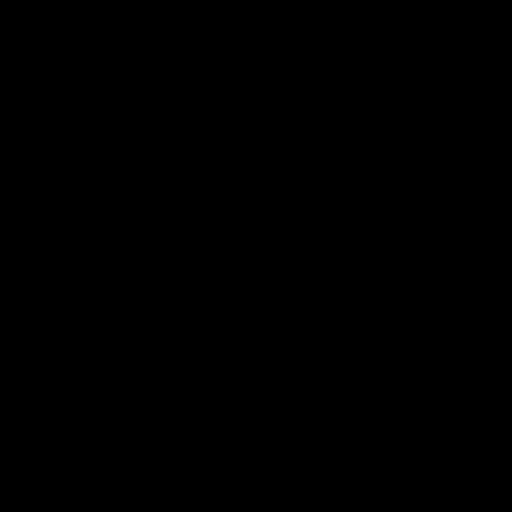

In [6]:
#TEXT TO IMAGE
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
negative_prompt = ""#input("Votre prompt négatif: ") #
do_cfg = True
cfg_scale = 7 #entre 1 et 14, pour dire a quel point l'IA fait attention au prompt

#IMAGE TO IMAGE
input_image = None
image_path = "../images/"#+input("Nom et extention de l'image")
#input_image = Image.open(image_path)
strength = 0.9 #combien de bruit on met dans l'image

sampler = "ddpm"
n_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt = prompt,
    negative_prompt = negative_prompt,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name = sampler,
    models = models,
    n_inference_steps = n_inference_steps,
    seed = seed,
    device = DEVICE,
    idle_device = "cpu",
    tokenizer = tokenizer,
    input_image = input_image,
    strength = strength
)

Image.fromarray(output_image)